# Libraries

In [30]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import geoplot as gplt


# Importing Data

Encounter Data

In [31]:
df_enc = pd.read_csv('data\encounter-events.csv')
df_enc.head()

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


Loitering Data

In [32]:
df_loit = pd.read_csv('data\loitering-events.csv')
df_loit.head()

,transshipment_mmsi,starting_latitude,starting_longitude,ending_latitude,ending_longitude,starting_timestamp,ending_timestamp,median_speed_knots,total_event_duration
0,256064000,12.793800,-69.503235,12.727950,-69.739120,2017-09-06T02:11:32Z,2017-09-06T15:44:15Z,1.091065,13.915556
1,256064000,25.405013,-56.302800,25.393350,-56.488250,2017-07-22T13:19:49Z,2017-07-22T23:59:17Z,1.548335,10.897639
2,256064000,10.693413,-78.512800,10.484500,-78.884300,2017-11-29T14:48:51Z,2017-11-30T07:43:36Z,1.503456,18.001389
3,256064000,11.858933,-75.553383,12.007627,-75.535627,2017-09-07T23:39:03Z,2017-09-08T14:59:26Z,0.650355,16.193611
4,256064000,45.938747,-23.796960,45.976960,-23.449387,2017-08-17T23:18:21Z,2017-08-18T17:56:30Z,1.009874,19.748333


Vessel Data

In [33]:
df_ves = pd.read_csv('data/transshipment-vessels.csv')  

df_ves.head()

,mmsi,shipname,callsign,flag,imo,first_timestamp,last_timestamp
0,306117000.0,SIERRALAUREL,PJBQ,ANT,9163403.0,2018-03-29T08:34:21Z,2018-06-30T17:08:41Z
1,306873000.0,SIERRALEYRE,PJJZ,ANT,9135822.0,2012-01-01T01:06:00Z,2012-06-26T08:58:28Z
2,309681.0,GREENBRAZIL,C6WH6,BHS,9045792.0,2018-06-29T10:34:00Z,2018-06-30T23:47:40Z
3,308735000.0,NOVA BRETAGNE,C6JI7,BHS,9000364.0,2012-01-01T00:39:08Z,2013-09-12T10:03:48Z
4,311000682.0,SIERRA LARA,C6DI3,BHS,9120205.0,2017-07-03T10:28:05Z,2018-06-30T23:35:36Z


# Maps

## Encounter Events: Scatterplot

<AxesSubplot:>

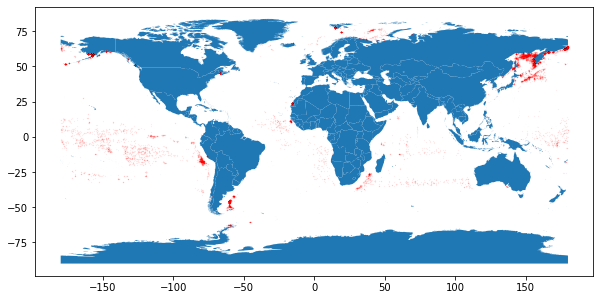

In [34]:
geometry = [Point(xy) for xy in zip(df_enc['mean_longitude'], df_enc['mean_latitude'])]
gdf_enc = gpd.GeoDataFrame(df_enc.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy

world = gpd.read_file('external_data/earth/ne_10m_admin_0_countries.shp')

gdf_enc.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.1, alpha = 0.1)

This map shows the geographic distribution of all events in the encounter data set

I.e. identified transshipment behavior where both the transshipment as well as the fishing vessel have both an active AIS and a MMSI registration

Even without regard to our other features we can already identify that the data's distribution varies geographically 

A ML approach employing more of the dataset's features should be able to discern even more detailed patterns

## Encounter Events: KDE Plot

C:\Users\janck\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


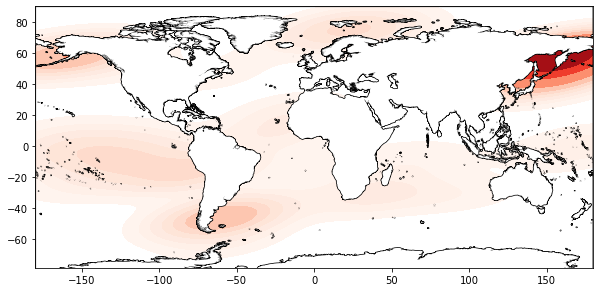

In [35]:
ocean = gpd.read_file("external_data/ocean/ne_10m_ocean.shp")

ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")



plotdf = gplt.kdeplot(gdf_enc, ax= ax,  cmap ="Reds", clip = ocean, shade = True , legend = True, thresh = 0.05)

plotdf.set_axis_on()

To enhance readability we als plotted density estimates of the geographical distribution

Similar to the scatterplot above we can clearly recognize geographical patterns, but also that transshipment behavior is much more common in the northern pacific

## Loitering Events: Scatterplot

<AxesSubplot:>

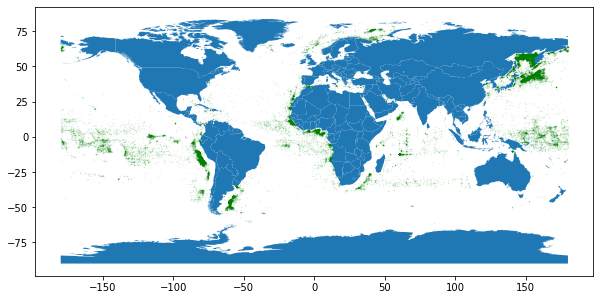

In [36]:
geometry = [Point(xy) for xy in zip(df_loit['starting_longitude'], df_loit['starting_latitude'])]
gdf_loit = gpd.GeoDataFrame(df_loit.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy


world = gpd.read_file('external_data/earth/ne_10m_admin_0_countries.shp')

gdf_loit.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='green', markersize=0.1, alpha = 0.1)

This map shows the geographic distribution of all events in the loitering data set

I.e. possible transshipment behavior where a transshipment capable vessel loiters in an off coast area without another vessel with an active AIS and MMSI registration nearby

This behavior can be indicative of causes unrelated to transshipment, f.i. damage, maintenance, drills etc. 

But also of both law abiding transshipment with smaller vessel as well as behavior intended to obfuscate 

Even without regard to our other features we can already identify that the data's distribution varies geographically and in a way similar to the encounter data set

A ML approach employing more of the dataset's features should be able to discern even more detailed patterns and possibly give us more insight into the causes

## Loitering Events: KDE Plot

C:\Users\janck\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


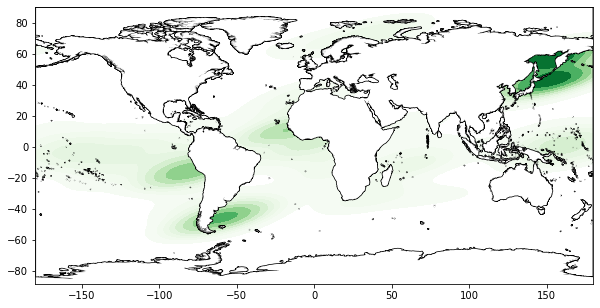

In [37]:
ocean = gpd.read_file("external_data/ocean/ne_10m_ocean.shp")

ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")



plotdf = gplt.kdeplot(gdf_loit, ax= ax,  cmap ="Greens", clip = ocean, shade = True , legend = True, thresh = 0.05)

plotdf.set_axis_on()

To enhance readability we als plotted density estimates of the geographical distribution

Similar to the scatterplot above we can clearly recognize geographical patterns, but also that loitering behavior is much more common in the northern pacific

This is again quite similar to the encounter dataset